# Testbed for our package

Once we prototyped all functionality in notebooks, let's try to deploy it as a `*.py` package.

Compared to the notebooks, the package has a bit more resilience to bad data inputs, to `na`s in the data, etc. It supports custom data ranges, as demonstrated below.

In [1]:
import my_climate as climate

In [2]:
df = climate.read_data('../data/kaggle_climate/', 'cities', verbose=1)

About to read from ../data/kaggle_climate/GlobalLandTemperaturesByCity.csv
Read successfully. Brushing the data up a bit.


                 City  Between_var  Within_var    SD_full
1635            Kyzyl   276.995086   12.503815  17.014667
1108           Hailar   275.472452    7.097934  16.809830
3337          Yakeshi   275.472452    7.097934  16.809830
390   Blagoveshchensk   274.832169    7.327912  16.797621


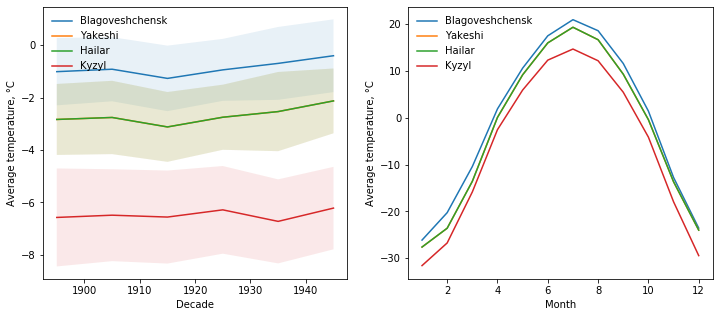

In [3]:
cities = climate.top_variable_cities(df, 4, '1890-01-01', '1950-01-01', verbose=1)
climate.plot_cities(df, cities, '1890-01-01', '1950-01-01', save_png=False)

# Note that the package doesn't filter "twin cities" (those with duplicate date) out.
# We could make it happen by having some sort of a while loop that runs until we have 
# n distinct cities in the output, but I'm not sure it is within the scope of this task for now.

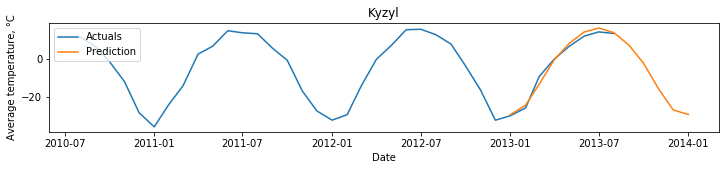

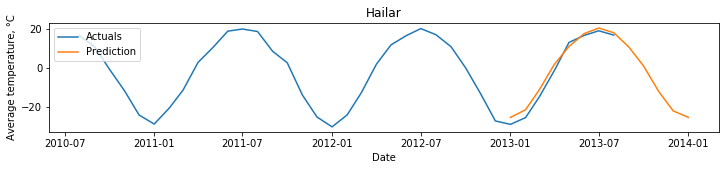

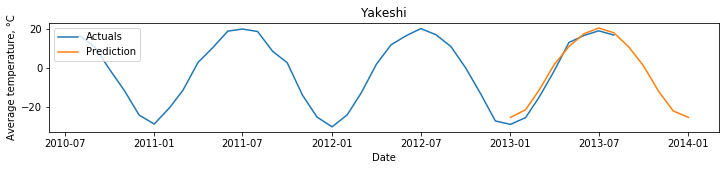

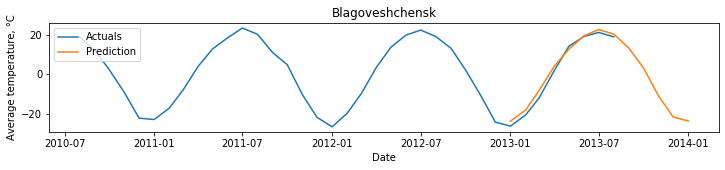

In [4]:
for city in cities:
    df_prediction = climate.predict_climate(df, city)
    # The method supports other date periods, but let's go with defaults
    climate.prediction_plot(df, city, df_prediction)